In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("loan.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
df['Gender'].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [8]:
df["Loan_Amount_Term"].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [9]:
df.groupby(by="Loan_Status")["Gender"].value_counts()

Loan_Status  Gender
N            Male      150
             Female     37
Y            Male      339
             Female     75
Name: count, dtype: int64

In [10]:
df.groupby(by="Loan_Status")["Loan_Amount_Term"].value_counts()

Loan_Status  Loan_Amount_Term
N            360.0               153
             180.0                15
             480.0                 9
             300.0                 5
             36.0                  2
             84.0                  1
             240.0                 1
Y            360.0               359
             180.0                29
             300.0                 8
             480.0                 6
             84.0                  3
             120.0                 3
             240.0                 3
             60.0                  2
             12.0                  1
Name: count, dtype: int64

In [11]:
df.drop("Loan_ID",axis=1,inplace=True)

In [12]:
df['Gender'].fillna("Male", inplace=True)

In [13]:
df['Married'].fillna("Yes", inplace=True)

In [14]:
df['Self_Employed'].fillna("No", inplace=True)

<Axes: xlabel='LoanAmount', ylabel='Count'>

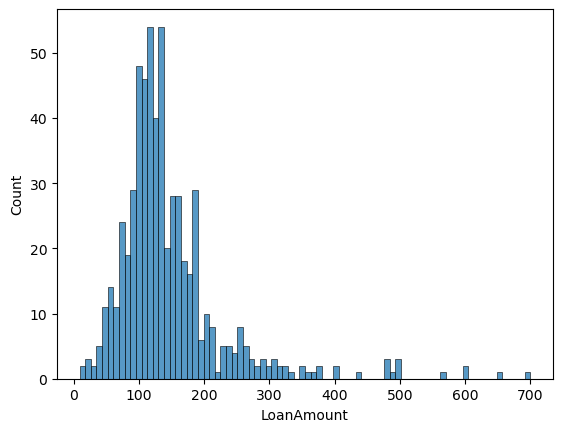

In [15]:
sns.histplot(data=df, x= "LoanAmount", bins = 80)

In [16]:
df["LoanAmount"].value_counts().sort_values(ascending=False)

LoanAmount
120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
570.0     1
145.0     1
243.0     1
250.0     1
253.0     1
Name: count, Length: 203, dtype: int64

In [17]:
df["LoanAmount"].mean()

146.41216216216216

In [18]:
df["LoanAmount"].fillna(value=df["LoanAmount"].mean(),inplace=True)

In [19]:
df.groupby(by="Loan_Status")["Credit_History"].value_counts()

Loan_Status  Credit_History
N            1.0                97
             0.0                82
Y            1.0               378
             0.0                 7
Name: count, dtype: int64

<Axes: xlabel='Loan_Status', ylabel='Count'>

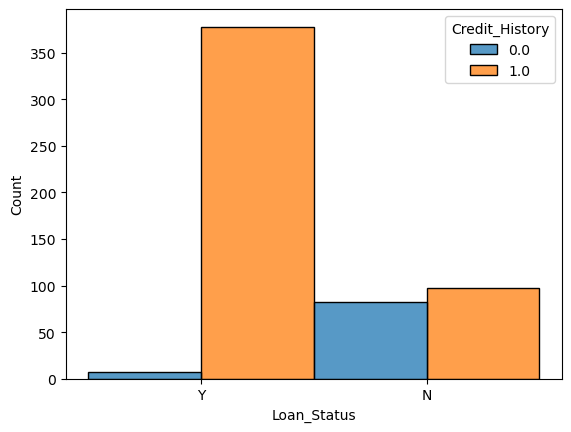

In [20]:
sns.histplot(data=df, x="Loan_Status", hue= "Credit_History",multiple="dodge")

In [21]:
# df[df["Loan_Status"]=="Y"]['Credit_History'].fillna(value=1, inplace = True)

In [22]:
df.loc[df["Loan_Status"] == "Y", 'Credit_History'] = df.loc[df["Loan_Status"] == "Y", 'Credit_History'].fillna(1)

In [23]:
df['Dependents']=df['Dependents'].map({"0":0,"1":1,"2":2,"3+":3})

<Axes: xlabel='Dependents', ylabel='Count'>

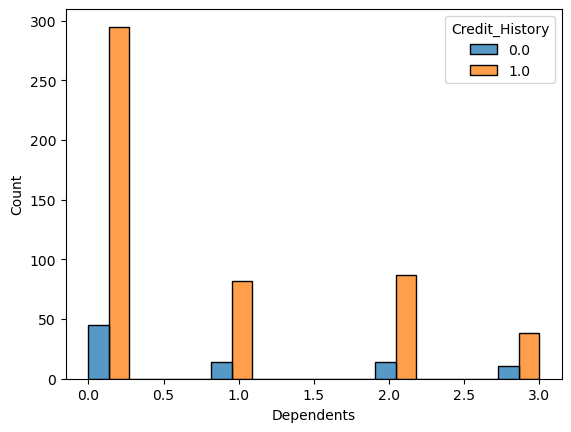

In [24]:
sns.histplot(data=df, x="Dependents", hue= "Credit_History",multiple="dodge")

In [25]:
df['Dependents'].fillna(value=0, inplace = True)

In [26]:
df['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

<Axes: xlabel='Loan_Amount_Term', ylabel='Count'>

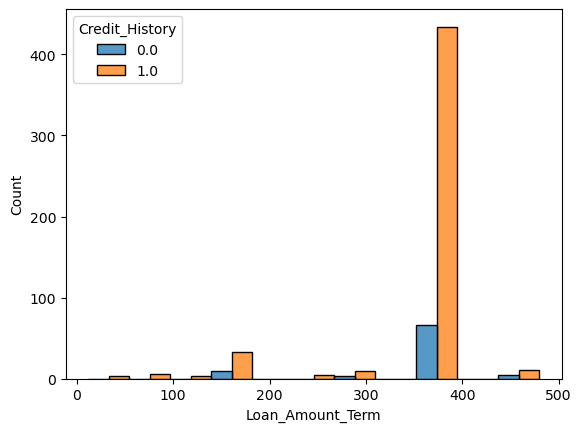

In [27]:
sns.histplot(data=df, x="Loan_Amount_Term", hue= "Credit_History",multiple="dodge")

In [28]:
df['Loan_Amount_Term'].fillna(value=360, inplace = True)

In [29]:
df["Credit_History"].value_counts()

Credit_History
1.0    512
0.0     89
Name: count, dtype: int64

In [30]:
df["Credit_History"].fillna(value=1, inplace=True)

In [31]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    float64
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(5), int64(1), object(6)
memory usage: 57.7+ KB


In [33]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [34]:
df["Gender"] = df["Gender"].map({"Male": 1, "Female": 0})

In [35]:
df["Married"] = df["Married"].map({"Yes":1, "No":0})

In [36]:
df["Education"] = df["Education"].map({"Graduate":1, "Not Graduate":0})

In [37]:
df["Self_Employed"] = df['Self_Employed'].map({"Yes": 1, "No":0})

In [38]:
df["Property_Area"].value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

In [39]:
df["Property_Area"] = df['Property_Area'].map({"Urban": 2, "Rural": 0, "Semiurban":1})

In [40]:
df["Loan_Status"] = df['Loan_Status'].map({"Y":1, "N": 0})

In [41]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    float64
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(5), int64(7)
memory usage: 57.7 KB


In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X = df.drop("Loan_Status", axis=1)
y = df["Loan_Status"]

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y ,test_size=0.3, random_state=42)

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
scaler = StandardScaler()

In [48]:
X_train = scaler.fit_transform(X_train)

In [49]:
X_test = scaler.transform(X_test)

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
model = LogisticRegression()

In [52]:
model.fit(X_train, y_train)

LogisticRegression()

In [53]:
predictions = model.predict(X_test)

In [54]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [55]:
print(accuracy_score(y_test, predictions))

0.8540540540540541


In [56]:
print(confusion_matrix(y_test, predictions))

[[ 33  25]
 [  2 125]]


In [57]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      0.57      0.71        58
           1       0.83      0.98      0.90       127

    accuracy                           0.85       185
   macro avg       0.89      0.78      0.81       185
weighted avg       0.87      0.85      0.84       185



In [58]:
from sklearn.svm import SVC

In [59]:
classifier = SVC(kernel="linear")

In [60]:
X_train = scaler.fit_transform(X_train)

In [61]:
X_test = scaler.transform(X_test)

In [62]:
classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [63]:
class_predicitions = classifier.predict(X_test)

In [64]:
print(accuracy_score(y_test, class_predicitions))
print("")
print(confusion_matrix(y_test, class_predicitions))
print("")
print(classification_report(y_test, class_predicitions))

0.8486486486486486

[[ 32  26]
 [  2 125]]

              precision    recall  f1-score   support

           0       0.94      0.55      0.70        58
           1       0.83      0.98      0.90       127

    accuracy                           0.85       185
   macro avg       0.88      0.77      0.80       185
weighted avg       0.86      0.85      0.84       185

